In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import torch
from numpy.random import seed
from matplotlib import pyplot as plt

from pandas import read_csv
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split


import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Tanh
from torch.nn import Module

In [ ]:
# Loading the dataset
# data_colon = pd.read_csv('/content/drive/MyDrive/bnetlab autoencoder_for_cancer_subtype master Data_Autoencoder_Final/COAD/COAD_data_1000_Features.csv')
# data_colon.head(20)

In [ ]:
# Loading the GBM dataset
# data_set= pd.read_csv("/content/drive/MyDrive/bnetlab autoencoder_for_cancer_subtype master Data_Autoencoder_Final/BGM/merged_data_GBM1.csv")
# data_set.head(n=10)

In [ ]:
# # Loading the KRCC dataset
data_set= pd.read_csv('/content/drive/MyDrive/bnetlab autoencoder_for_cancer_subtype master Data_Autoencoder_Final/KRCC/data_KRCC_F1000.csv')
data_set.head(n=20)

,Pacients,cg10117369,cg14433673,cg00831028,cg07498879,cg07115820,cg00563926,cg07525445,cg07401901,cg22248011,...,ZNF229LLL7772,KIAA1543LLL57662,NAGALLL4668,TRIM9LLL114088,CCDC37LLL348807,IP6K3LLL117283,FMNL1LLL752,DDAH1LLL23576,C17orf75LLL64149,TBC1D15LLL64786
0,TCGA.A3.3308.01A.01D.0859.05,-0.468794,-0.684153,0.046447,-0.906906,-0.104750,0.853781,-0.578769,-1.192295,-0.836395,...,0.603422,0.129187,-0.808663,1.226618,1.488574,-0.336252,-0.286685,2.013627,-0.346495,-0.595857
1,TCGA.A3.3311.01A.01D.0859.05,0.601205,0.764087,-1.082173,-0.361270,0.095346,-0.596307,-1.000540,-0.428029,-1.261109,...,1.086586,-0.136331,0.414685,-0.107822,0.074988,-0.219605,0.531584,1.471288,-0.059254,0.236611
2,TCGA.A3.3313.01A.01D.0859.05,1.373231,-1.034971,-0.049296,0.627696,1.343473,-0.762787,-1.446752,-1.084364,-1.366571,...,-0.573039,0.437648,-1.193119,-1.232301,-1.152223,5.609643,-1.103386,-1.034293,3.026510,-0.996002
3,TCGA.A3.3316.01A.01D.0859.05,0.278036,1.125925,-1.010909,-0.632922,0.489381,1.163929,-1.113546,-0.793474,-1.208351,...,1.481095,-0.933222,0.166567,1.113557,-0.143647,-0.304031,-0.243154,-0.617499,-0.435714,-0.901976
4,TCGA.A3.3317.01A.01D.0859.05,-0.404637,-1.008454,-1.241698,0.276659,1.153825,-0.131119,-0.177111,-0.741998,-1.103163,...,-0.982184,1.367228,-0.368904,-0.655435,-0.176964,-0.043786,-0.051266,0.739140,-0.286965,-1.071856
5,TCGA.A3.3319.01A.01D.0859.05,0.145286,-1.036347,-0.722449,-1.085751,0.844164,-1.076564,0.838707,-0.824922,-0.849387,...,-0.101164,0.654663,0.685200,0.231564,-0.329981,-0.525190,-0.069685,0.038966,-0.819432,0.349765
6,TCGA.A3.3320.01A.01D.0859.05,0.211034,0.846475,-0.703112,1.489264,-1.541947,-0.689342,-0.048139,-0.942599,-0.569666,...,0.946752,1.575695,-0.432170,-0.908495,-0.166057,-0.377943,-0.405457,1.288778,-0.450128,1.868732
7,TCGA.A3.3322.01A.01D.0859.05,-0.701747,1.706166,-1.448889,0.724368,0.097334,-1.035885,-0.445261,-1.064364,-1.646360,...,1.309874,0.858800,-0.857797,1.325779,0.657525,-0.162506,-0.483852,0.385950,-0.749312,-0.064708
8,TCGA.A3.3323.01A.01D.0859.05,0.301846,-0.697621,-0.088820,-1.755986,-0.015662,-0.395948,-0.141156,-1.066634,-1.108777,...,-0.065812,-0.846219,0.247794,1.819594,-0.106766,-0.476392,0.717600,-0.223097,-0.268765,-0.035070
9,TCGA.A3.3324.01A.01D.0859.05,-0.510133,0.314516,-1.550821,0.027924,-1.387968,-0.156933,0.168242,-1.020054,-1.195962,...,0.085968,-0.391810,0.026649,0.049964,-0.393198,0.563469,0.007507,0.533604,-0.155513,-0.109203


In [ ]:
# #loading the BIC dataset
# data_set= pd.read_csv("/content/drive/MyDrive/bnetlab autoencoder_for_cancer_subtype master Data_Autoencoder_Final/BIC/data_BIC_F1000.csv")
# data_set.head(n=10)

In [ ]:
#for COAD dataset
# Pacients = data_colon['Pacients']
# Pacients

In [ ]:
Pacients = data_set['Pacients']
Pacients

0      TCGA.A3.3308.01A.01D.0859.05
1      TCGA.A3.3311.01A.01D.0859.05
2      TCGA.A3.3313.01A.01D.0859.05
3      TCGA.A3.3316.01A.01D.0859.05
4      TCGA.A3.3317.01A.01D.0859.05
                   ...             
117    TCGA.CJ.4892.01A.01D.1303.05
118    TCGA.CJ.4893.01A.01D.1303.05
119    TCGA.CJ.4894.01A.01D.1303.05
120    TCGA.CZ.4861.01A.01D.1303.05
121    TCGA.CZ.4862.01A.01D.1303.05
Name: Pacients, Length: 122, dtype: object

In [ ]:
#data_colon.drop(['Pacients'], axis=0, inplace=True)
# data_colon.drop(data_colon.columns[0], axis=1, inplace=True)
# data_colon

In [ ]:
data_set.drop(data_set.columns[0], axis=1, inplace=True)
data_set

,cg10117369,cg14433673,cg00831028,cg07498879,cg07115820,cg00563926,cg07525445,cg07401901,cg22248011,cg26279025,...,ZNF229LLL7772,KIAA1543LLL57662,NAGALLL4668,TRIM9LLL114088,CCDC37LLL348807,IP6K3LLL117283,FMNL1LLL752,DDAH1LLL23576,C17orf75LLL64149,TBC1D15LLL64786
0,-0.468794,-0.684153,0.046447,-0.906906,-0.104750,0.853781,-0.578769,-1.192295,-0.836395,-0.682622,...,0.603422,0.129187,-0.808663,1.226618,1.488574,-0.336252,-0.286685,2.013627,-0.346495,-0.595857
1,0.601205,0.764087,-1.082173,-0.361270,0.095346,-0.596307,-1.000540,-0.428029,-1.261109,-0.909158,...,1.086586,-0.136331,0.414685,-0.107822,0.074988,-0.219605,0.531584,1.471288,-0.059254,0.236611
2,1.373231,-1.034971,-0.049296,0.627696,1.343473,-0.762787,-1.446752,-1.084364,-1.366571,-0.680094,...,-0.573039,0.437648,-1.193119,-1.232301,-1.152223,5.609643,-1.103386,-1.034293,3.026510,-0.996002
3,0.278036,1.125925,-1.010909,-0.632922,0.489381,1.163929,-1.113546,-0.793474,-1.208351,0.191311,...,1.481095,-0.933222,0.166567,1.113557,-0.143647,-0.304031,-0.243154,-0.617499,-0.435714,-0.901976
4,-0.404637,-1.008454,-1.241698,0.276659,1.153825,-0.131119,-0.177111,-0.741998,-1.103163,-0.169455,...,-0.982184,1.367228,-0.368904,-0.655435,-0.176964,-0.043786,-0.051266,0.739140,-0.286965,-1.071856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,-0.760304,-0.127193,0.062201,0.212509,0.287963,-0.233101,1.360491,0.037245,-0.298382,0.915513,...,-0.110566,2.105001,0.443744,0.068616,2.559211,-0.452743,0.572790,0.749449,-0.707472,-0.118666
118,0.073394,0.793865,-0.429921,-0.119488,0.163163,0.855280,1.002491,-0.721330,-0.502737,2.122586,...,0.180579,0.684021,0.399071,-0.552875,-0.271362,-0.161845,0.194251,1.501981,-0.262748,0.868200
119,-0.910435,0.746799,1.100508,-0.296938,0.269245,1.333798,-0.769678,-1.037039,-1.008391,-0.880839,...,0.253923,1.181119,1.260260,-1.067202,-0.455894,0.406552,0.413069,-0.655789,0.215366,0.287808
120,1.069370,0.243281,0.611074,0.481920,0.526215,1.751523,-0.024120,-1.067674,-0.696358,0.440073,...,0.169830,-0.753340,1.513764,-0.795833,-0.528399,-0.419229,0.678060,-0.484566,-0.117488,-0.443329


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler    = MinMaxScaler()
# df_norm   = scaler.fit_transform(data_colon)
# df_norm

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler    = MinMaxScaler()
df_norm   = scaler.fit_transform(data_set)
df_norm

array([[0.46654225, 0.13730711, 0.27817198, ..., 0.9330835 , 0.18139908,
        0.17816195],
       [0.72904133, 0.6497056 , 0.09649662, ..., 0.80425574, 0.22735011,
        0.31079418],
       [0.91843974, 0.013185  , 0.26276011, ..., 0.20907744, 0.72099147,
        0.11440921],
       ...,
       [0.35819603, 0.64358897, 0.44784548, ..., 0.29898767, 0.27128211,
        0.31895109],
       [0.8438946 , 0.46544042, 0.36906068, ..., 0.33966016, 0.2180342 ,
        0.20246334],
       [0.3105578 , 0.        , 0.2172867 , ..., 0.44901075, 0.4599848 ,
        0.34865229]])

In [ ]:
#Define the VAE architecture by creating two separate sub-networks for encoder and decoder, respectively.
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc21 = nn.Linear(hidden_size, latent_size)
        self.fc22 = nn.Linear(hidden_size, latent_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        mean = self.fc21(x)
        logvar = self.fc22(x)
        return mean, logvar


class Decoder(nn.Module):
    def __init__(self, latent_size, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, z):
        z = torch.relu(self.fc1(z))
        x_hat = torch.sigmoid(self.fc2(z))
        return x_hat


In [ ]:
# Define a custom layer called KLDivergenceLayer to calculate the KL divergence loss between the approximate posterior and the prior distribution in the latent space
class KLDivergenceLayer(nn.Module):
    def __init__(self):
        super(KLDivergenceLayer, self).__init__()

    def forward(self, mean, logvar):
        kl_divergence = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp(), dim=1)
        return kl_divergence


In [ ]:
#Define the VAE model by connecting the encoder and decoder sub-networks,
#and compile the model using the negative log-likelihood loss function
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_size, hidden_size, latent_size)
        self.decoder = Decoder(latent_size, hidden_size, input_size)
        self.kld_layer = KLDivergenceLayer()

    def forward(self, x):
        mean, logvar = self.encoder(x)
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mean + eps * std
        x_hat = self.decoder(z)
        return x_hat, mean, logvar

    def loss_fn(self, x, x_hat, mean, logvar):
        bce_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
        kld_loss = torch.mean(self.kld_layer(mean, logvar))
        loss = bce_loss + kld_loss
        return loss


In [ ]:
# Split the data into training and testing sets
train_data = df_norm[:int(0.7*df_norm.shape[0])]
test_data = df_norm[int(0.7*df_norm.shape[0]):]
print(train_data.shape, test_data.shape)

(85, 1000) (37, 1000)


In [ ]:
#Define a callback function to save the best model based on the validation loss.
class SaveBestModelCallback:
    def __init__(self, model):
        self.best_loss = np.inf
        self.model = model

    def __call__(self, epoch_loss, model):
        if epoch_loss < self.best_loss:
            self.best_loss = epoch_loss
            torch.save(model.state_dict(), 'best_model.pt')


In [ ]:
#Train the VAE model on the training set and plot the training and validation loss curves.


# from typing_extensions import Self
from torch import optim

# Define the hyperparameters
input_size = train_data.shape[1]
hidden_size = 256
latent_size = 100
learning_rate = 1e-3
batch_size = 32
epochs = 100

# Create the VAE model and optimizer
model = VAE(input_size, hidden_size, latent_size)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Create the data loader for the training set
train_dataset = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataset = DataLoader(test_data, batch_size=batch_size, shuffle=True)

# Define the callback function
callback = SaveBestModelCallback(model)

# Train the model
train_loss = []
val_loss = []

for epoch in range(epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0
    model.train()

    for step, batch in enumerate(train_dataset):
        optimizer.zero_grad()
        # import pdb; pdb.set_trace()
        x = torch.tensor(batch, dtype=torch.float32)
        x_hat, mean, logvar = model(x)
        loss = model.loss_fn(x, x_hat, mean, logvar)
        if loss is not None:
            loss.backward()

        optimizer.step()
        epoch_train_loss += loss.item()

    epoch_train_loss = epoch_train_loss/(step+1)


    model.eval()
    with torch.no_grad():
        for step, batch in enumerate(test_dataset):
            x = torch.tensor(batch, dtype=torch.float32)
            x_hat, mean, logvar = model(x)
            loss = model.loss_fn(x, x_hat, mean, logvar)
            if loss is not None:
                epoch_val_loss += loss.item()

    epoch_val_loss = epoch_val_loss/(step+1)


    train_loss.append(epoch_train_loss)
    val_loss.append(epoch_val_loss)
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

    # Call the callback function after each epoch
    callback(epoch_val_loss, model)

# Extract the encoded representations of the input data using the trained encoder sub-network
encoder = model.encoder
encoded_data, _ = encoder(torch.tensor(df_norm, dtype=torch.float32))
encoded_data = encoded_data.detach().numpy()

Epoch [1/100], Train Loss: 19461.3258, Val Loss: 12189.7866
Epoch [2/100], Train Loss: 18130.6012, Val Loss: 11226.2288
Epoch [3/100], Train Loss: 16729.3281, Val Loss: 11069.1050
Epoch [4/100], Train Loss: 16071.3883, Val Loss: 10510.9108
Epoch [5/100], Train Loss: 15748.1875, Val Loss: 10418.4664
Epoch [6/100], Train Loss: 15654.9434, Val Loss: 10423.4935


<ipython-input-117-b46454d7fe24>:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(batch, dtype=torch.float32)
<ipython-input-117-b46454d7fe24>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(batch, dtype=torch.float32)


Epoch [7/100], Train Loss: 15610.4987, Val Loss: 10402.0167
Epoch [8/100], Train Loss: 15505.4486, Val Loss: 10298.2954
Epoch [9/100], Train Loss: 15474.4339, Val Loss: 10279.2554
Epoch [10/100], Train Loss: 15423.9229, Val Loss: 10306.3342
Epoch [11/100], Train Loss: 15393.1553, Val Loss: 10288.3245
Epoch [12/100], Train Loss: 15365.5703, Val Loss: 10258.5052
Epoch [13/100], Train Loss: 15349.6071, Val Loss: 10260.7787
Epoch [14/100], Train Loss: 15330.9499, Val Loss: 10283.2523
Epoch [15/100], Train Loss: 15318.9388, Val Loss: 10257.2529
Epoch [16/100], Train Loss: 15305.4629, Val Loss: 10250.8678
Epoch [17/100], Train Loss: 15304.6921, Val Loss: 10290.3566
Epoch [18/100], Train Loss: 15294.0866, Val Loss: 10254.8815
Epoch [19/100], Train Loss: 15302.3118, Val Loss: 10235.6173
Epoch [20/100], Train Loss: 15261.4391, Val Loss: 10283.3251
Epoch [21/100], Train Loss: 15268.0986, Val Loss: 10231.2183
Epoch [22/100], Train Loss: 15250.4186, Val Loss: 10238.4442
Epoch [23/100], Train Loss:

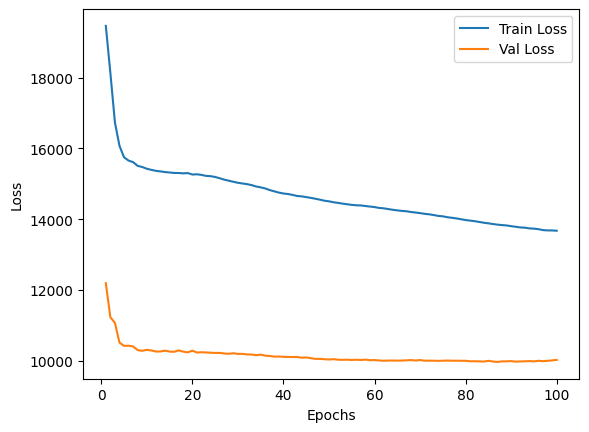

In [ ]:
# Plot the training and validation loss curves
plt.plot(range(1, epochs + 1), train_loss, label='Train Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
encoded_data.shape

(122, 100)

In [ ]:
print(type(encoded_data))

<class 'numpy.ndarray'>


In [ ]:
#Get the output
# encoded_data=  encoder.predict()
latent_rep=pd.DataFrame(encoded_data)
latent_rep

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.172871,-0.004107,-1.104054,-0.882604,-1.196951,0.524261,0.830768,0.657570,-0.485118,0.112720,...,0.201040,0.106157,0.242973,1.783806,1.076576,1.149549,-0.745508,0.891972,1.765109,-1.558114
1,0.915114,0.495897,-1.006300,-0.370990,-0.494007,-0.968087,-0.022677,1.350211,0.330203,0.337624,...,-0.706875,-0.211253,0.105965,0.892164,1.206605,0.857533,-0.650582,0.679859,0.574602,-1.264519
2,1.384722,0.879819,0.351449,0.382157,-1.216301,0.950081,-1.865493,1.409921,-3.495771,0.405689,...,-0.766296,-1.217109,-0.405648,1.020026,-0.341123,1.309192,-1.002566,0.973764,-0.483170,-0.934195
3,1.228556,-0.056378,-1.672832,-1.257740,-0.600812,-1.045905,-0.299474,1.424028,-0.524785,1.756484,...,-0.114993,0.249440,0.755395,1.799980,1.412776,2.166004,-0.504756,0.511034,1.825152,-1.426806
4,1.033210,0.278044,-0.608057,-0.930605,-1.062305,0.669796,0.201364,1.357368,-1.548776,0.745134,...,-0.573878,-0.296503,0.282118,1.501092,1.452249,0.182738,-0.921812,0.724485,0.496019,-1.247313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,-0.479629,0.780322,-0.421618,-1.093257,0.664657,0.160702,0.483207,0.403541,1.859317,-0.344793,...,-0.161312,0.384715,0.926813,-0.320402,0.640269,-2.022381,-0.047566,-0.169935,1.125867,-1.396358
118,-0.123103,0.743483,-0.665610,-0.734135,0.674487,-0.293618,0.559817,0.560759,2.062744,-0.452702,...,-0.018109,0.578361,0.530348,0.033074,0.543584,-0.913437,-0.180845,0.142617,0.947756,-1.282165
119,0.306675,0.574391,-0.823202,-0.852361,-0.003357,-0.020834,0.774169,1.045612,0.701050,0.035273,...,-0.372934,0.100651,0.229486,0.680813,1.400512,-0.250034,-0.396937,0.378368,0.620077,-1.152239
120,-0.056320,0.371759,-1.192473,-0.760153,0.416124,-1.589117,-0.238719,0.947564,0.769820,0.045083,...,-0.440023,0.967157,0.532563,-0.085923,-0.065388,-0.078646,-0.201709,0.118761,0.838123,-1.276905


In [ ]:
latent_rep = latent_rep.add_prefix('feature_')
latent_rep

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,1.172871,-0.004107,-1.104054,-0.882604,-1.196951,0.524261,0.830768,0.657570,-0.485118,0.112720,...,0.201040,0.106157,0.242973,1.783806,1.076576,1.149549,-0.745508,0.891972,1.765109,-1.558114
1,0.915114,0.495897,-1.006300,-0.370990,-0.494007,-0.968087,-0.022677,1.350211,0.330203,0.337624,...,-0.706875,-0.211253,0.105965,0.892164,1.206605,0.857533,-0.650582,0.679859,0.574602,-1.264519
2,1.384722,0.879819,0.351449,0.382157,-1.216301,0.950081,-1.865493,1.409921,-3.495771,0.405689,...,-0.766296,-1.217109,-0.405648,1.020026,-0.341123,1.309192,-1.002566,0.973764,-0.483170,-0.934195
3,1.228556,-0.056378,-1.672832,-1.257740,-0.600812,-1.045905,-0.299474,1.424028,-0.524785,1.756484,...,-0.114993,0.249440,0.755395,1.799980,1.412776,2.166004,-0.504756,0.511034,1.825152,-1.426806
4,1.033210,0.278044,-0.608057,-0.930605,-1.062305,0.669796,0.201364,1.357368,-1.548776,0.745134,...,-0.573878,-0.296503,0.282118,1.501092,1.452249,0.182738,-0.921812,0.724485,0.496019,-1.247313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,-0.479629,0.780322,-0.421618,-1.093257,0.664657,0.160702,0.483207,0.403541,1.859317,-0.344793,...,-0.161312,0.384715,0.926813,-0.320402,0.640269,-2.022381,-0.047566,-0.169935,1.125867,-1.396358
118,-0.123103,0.743483,-0.665610,-0.734135,0.674487,-0.293618,0.559817,0.560759,2.062744,-0.452702,...,-0.018109,0.578361,0.530348,0.033074,0.543584,-0.913437,-0.180845,0.142617,0.947756,-1.282165
119,0.306675,0.574391,-0.823202,-0.852361,-0.003357,-0.020834,0.774169,1.045612,0.701050,0.035273,...,-0.372934,0.100651,0.229486,0.680813,1.400512,-0.250034,-0.396937,0.378368,0.620077,-1.152239
120,-0.056320,0.371759,-1.192473,-0.760153,0.416124,-1.589117,-0.238719,0.947564,0.769820,0.045083,...,-0.440023,0.967157,0.532563,-0.085923,-0.065388,-0.078646,-0.201709,0.118761,0.838123,-1.276905


In [ ]:
latent_rep.insert(0, 'Pacients', Pacients)
latent_rep

,Pacients,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,TCGA.A3.3308.01A.01D.0859.05,1.172871,-0.004107,-1.104054,-0.882604,-1.196951,0.524261,0.830768,0.657570,-0.485118,...,0.201040,0.106157,0.242973,1.783806,1.076576,1.149549,-0.745508,0.891972,1.765109,-1.558114
1,TCGA.A3.3311.01A.01D.0859.05,0.915114,0.495897,-1.006300,-0.370990,-0.494007,-0.968087,-0.022677,1.350211,0.330203,...,-0.706875,-0.211253,0.105965,0.892164,1.206605,0.857533,-0.650582,0.679859,0.574602,-1.264519
2,TCGA.A3.3313.01A.01D.0859.05,1.384722,0.879819,0.351449,0.382157,-1.216301,0.950081,-1.865493,1.409921,-3.495771,...,-0.766296,-1.217109,-0.405648,1.020026,-0.341123,1.309192,-1.002566,0.973764,-0.483170,-0.934195
3,TCGA.A3.3316.01A.01D.0859.05,1.228556,-0.056378,-1.672832,-1.257740,-0.600812,-1.045905,-0.299474,1.424028,-0.524785,...,-0.114993,0.249440,0.755395,1.799980,1.412776,2.166004,-0.504756,0.511034,1.825152,-1.426806
4,TCGA.A3.3317.01A.01D.0859.05,1.033210,0.278044,-0.608057,-0.930605,-1.062305,0.669796,0.201364,1.357368,-1.548776,...,-0.573878,-0.296503,0.282118,1.501092,1.452249,0.182738,-0.921812,0.724485,0.496019,-1.247313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,TCGA.CJ.4892.01A.01D.1303.05,-0.479629,0.780322,-0.421618,-1.093257,0.664657,0.160702,0.483207,0.403541,1.859317,...,-0.161312,0.384715,0.926813,-0.320402,0.640269,-2.022381,-0.047566,-0.169935,1.125867,-1.396358
118,TCGA.CJ.4893.01A.01D.1303.05,-0.123103,0.743483,-0.665610,-0.734135,0.674487,-0.293618,0.559817,0.560759,2.062744,...,-0.018109,0.578361,0.530348,0.033074,0.543584,-0.913437,-0.180845,0.142617,0.947756,-1.282165
119,TCGA.CJ.4894.01A.01D.1303.05,0.306675,0.574391,-0.823202,-0.852361,-0.003357,-0.020834,0.774169,1.045612,0.701050,...,-0.372934,0.100651,0.229486,0.680813,1.400512,-0.250034,-0.396937,0.378368,0.620077,-1.152239
120,TCGA.CZ.4861.01A.01D.1303.05,-0.056320,0.371759,-1.192473,-0.760153,0.416124,-1.589117,-0.238719,0.947564,0.769820,...,-0.440023,0.967157,0.532563,-0.085923,-0.065388,-0.078646,-0.201709,0.118761,0.838123,-1.276905


In [ ]:
#Write in csv
# latent_rep.to_csv("/content/drive/MyDrive/latentRepresentation_COAD_VARIATIONAL.csv", index=False)

In [ ]:
# latent_rep.to_csv("/content/drive/MyDrive/latentRepresentation_GBM_VARIATIONAL.csv", index=False)

In [ ]:
# latent_rep.to_csv("/content/drive/MyDrive/latentRepresentation_BIC_VARIATIONAL.csv", index=False)

In [ ]:
# latent_rep.to_csv("/content/drive/MyDrive/latentRepresentation_KRCC_VARIATIONAL.csv", index=False)

In [ ]:
# #configuration

# DEVICE=torch.device("cuda" if torch.cuda.is_available() else "cpu")
# ORIGINAL_DIM= df_norm.shape[1]
# INPUT_SHAPE = (ORIGINAL_DIM, )
# H_DIM = int(ORIGINAL_DIM/2)
# BATCH_SIZE = 128
# Z_DIM = 100
# NUM_EPOCHS = 80
# BATCH_SIZE=32
# LR_RATE= 3e-4 #karpathy constant
# epsilon_std = 1.0


In [ ]:
# #VAE architecture

# class VariationalAutoEncoder(nn.Module):
#     def __init__(self,input_dim,h_dim=200,z_dim=20):
#         super().__init__()
#         #encoder
#         self.img_2hid= nn.Linear(input_dim,h_dim)
#         self.hid_2mu =nn.Linear(h_dim,z_dim)
#         self.hid_2sigma=nn.Linear(h_dim,z_dim)

#         #decoder
#         self.z_2hid=nn.Linear(z_dim,h_dim)
#         self.hid_2img=nn.Linear(h_dim,input_dim)

#         self.relu=nn.ReLU()

#     def encode(self,x):
#         #q_phi(z|x)
#         h=self.relu(self.img_2hid(x))
#         mu=self.hid_2mu(h)
#         sigma=self.hid_2sigma(h)
#         return mu,sigma

#     def decode(self,z):
#         #p_theta(x|z)
#         h=self.relu(self.z_2hid(z))
#         return torch.sigmoid(self.hid_2img(h))

#     def forward(self,x):
#         mu,sigma=self.encode(x)
#         epsilon=torch.randn_like(sigma)
#         z_new=mu+sigma*epsilon
#         x_reconstructed=self.decode(z_new)
#         return x_reconstructed,mu,sigma


# if __name__ =="__main__":
#     #x= torch.randn(1,784)  #28*28=784
#     x=torch.randn(4,28*28)
#     vae=VariationalAutoEncoder(784)
#     x_reconstructed,mu,sigma=vae(x)
#     print(x_reconstructed.shape)
#     print(mu.shape)
#     print(sigma.shape)
#     #print(vae(x).shape)
